CSCA5632 Unsupervised Algorithms in Machine Learning - Final Project. 
In this project, we will be focusing on K-Means Clustering Algorithm to identify customers. 
We have used the dataset from Kaggle - https://www.kaggle.com/datasets/yasserh/customer-segmentation-dataset

In [1]:
# import required libraries for dataframe and visualization

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px


# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/customer-segmentation-dataset/Online Retail.xlsx


In [2]:
retail = pd.read_excel('/kaggle/input/customer-segmentation-dataset/Online Retail.xlsx')
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
initial_shape = retail.shape

In [4]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
retail.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [6]:
# Remove duplicates
retail = retail.drop_duplicates()

# Remove rows with missing values
retail = retail.dropna()

# Final shape after cleaning
final_shape = retail.shape

# Save the cleaned data to a new file (optional)
retail.to_excel("Cleaned_Online_Retail.xlsx", index=False)

# Summary of the cleaning process
print("Data cleaning completed.")



Data cleaning completed.


Number of outliers in Quantity: 26646
Number of outliers in UnitPrice: 35802


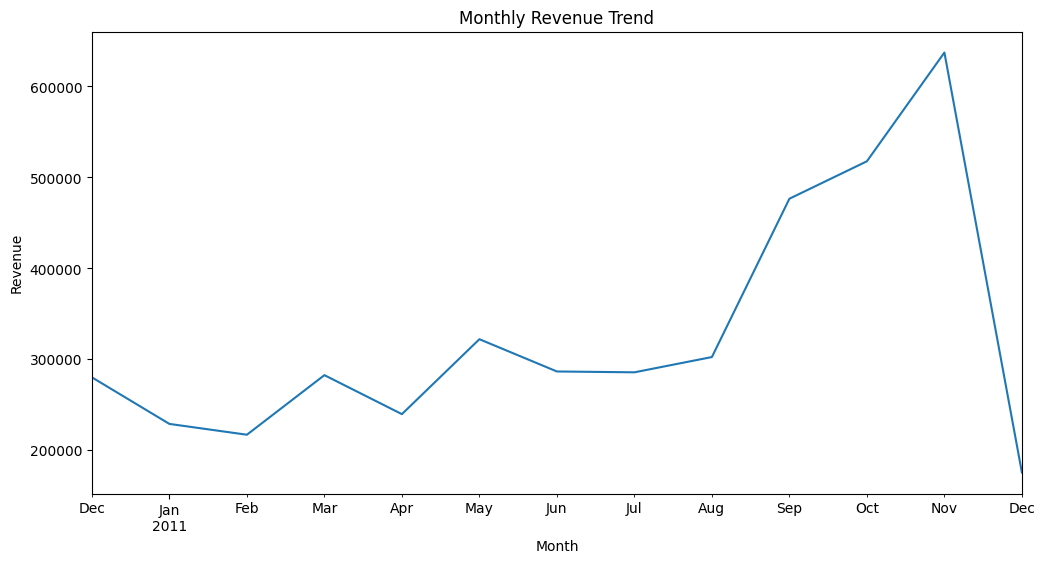

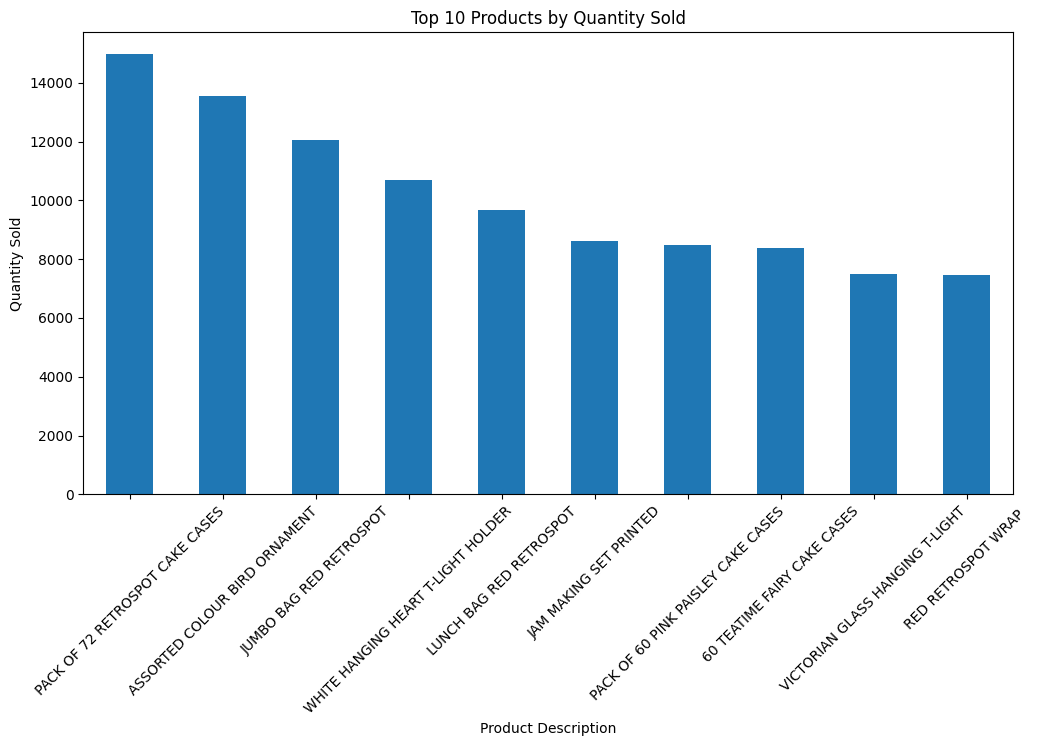

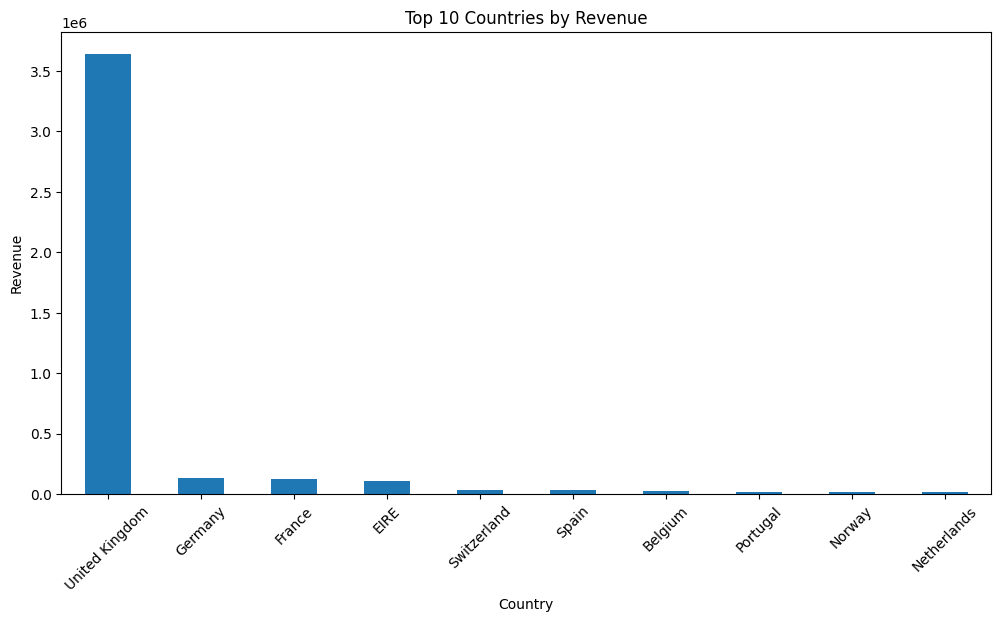


Descriptive Statistics:
            Quantity                    InvoiceDate      UnitPrice  \
count  339453.000000                         339453  339453.000000   
mean        7.350022  2011-07-12 07:31:33.842564096       2.203459   
min       -13.000000            2010-12-01 08:26:00       0.000000   
25%         2.000000            2011-04-08 08:21:00       1.250000   
50%         6.000000            2011-08-03 09:09:00       1.650000   
75%        12.000000            2011-10-21 14:41:00       2.950000   
max        27.000000            2011-12-09 12:50:00       7.500000   
std         6.890369                            NaN       1.549676   

          CustomerID        Revenue  
count  339453.000000  339453.000000  
mean    15312.608184      12.522085  
min     12347.000000     -81.000000  
25%     13983.000000       3.750000  
50%     15218.000000      10.080000  
75%     16813.000000      17.340000  
max     18287.000000     178.800000  
std      1711.910209      13.432954  

T

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
file_path = "Cleaned_Online_Retail.xlsx"
retail = pd.read_excel(file_path)

# Identify outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Check for outliers in Quantity and UnitPrice
outliers_quantity = detect_outliers(retail, 'Quantity')
outliers_unitprice = detect_outliers(retail, 'UnitPrice')

print("Number of outliers in Quantity:", outliers_quantity.shape[0])
print("Number of outliers in UnitPrice:", outliers_unitprice.shape[0])

# Remove outliers (optional)
retail = retail[~retail.index.isin(outliers_quantity.index)]
retail = retail[~retail.index.isin(outliers_unitprice.index)]

# Add a revenue column
retail['Revenue'] = retail['Quantity'] * retail['UnitPrice']

# Plot trends
plt.figure(figsize=(12, 6))
retail.groupby(retail['InvoiceDate'].dt.to_period('M'))['Revenue'].sum().plot()
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

# Top products by quantity sold
top_products = retail.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_products.plot(kind='bar')
plt.title("Top 10 Products by Quantity Sold")
plt.xlabel("Product Description")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45)
plt.show()

# Revenue by country
revenue_by_country = retail.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
revenue_by_country.plot(kind='bar')
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Country")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

# Perform EDA
print("\nDescriptive Statistics:")
print(retail.describe())

print("\nTop 5 Countries by Revenue:")
print(revenue_by_country)

print("\nTop 5 Products by Quantity Sold:")
print(top_products)


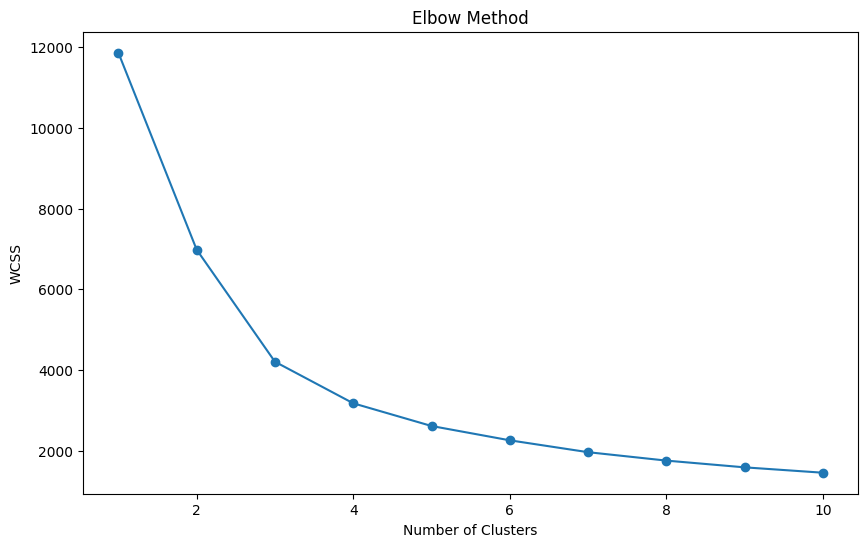

Cluster Summary:
   Cluster     Recency   Frequency     Monetary
0        0   49.474403   39.634812   557.664292
1        1   39.481193  119.322957  2056.721169
2        2  253.300100   22.986042   343.389492
3        3   22.904762  359.119048  2333.601905


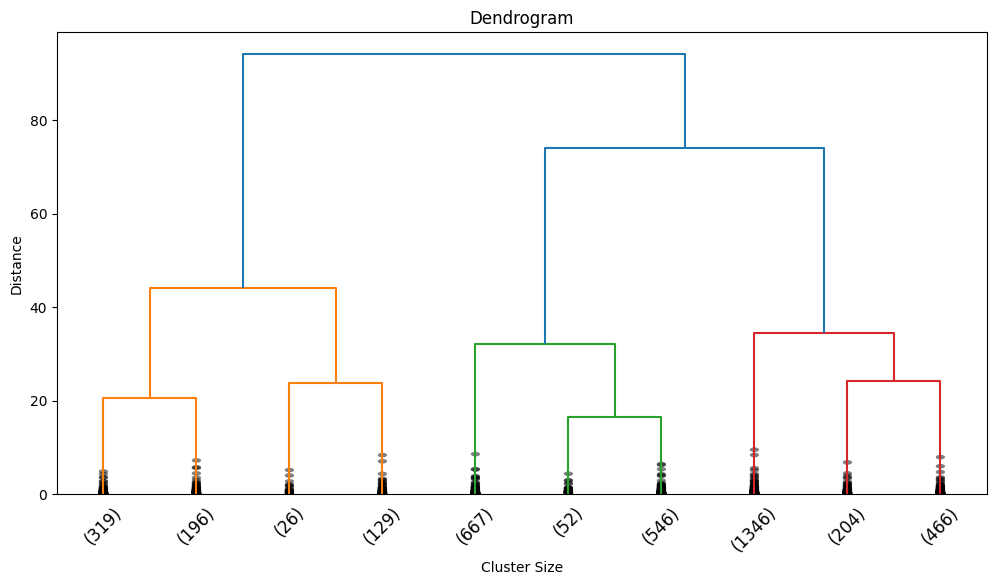

Silhouette Score for K-Means: 0.47


In [8]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Load the cleaned dataset
file_path = "Cleaned_Online_Retail.xlsx"
retail = pd.read_excel(file_path)

# Add Revenue column for Monetary value
retail['Revenue'] = retail['Quantity'] * retail['UnitPrice']

# Prepare RFM metrics
rfm = retail.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (retail['InvoiceDate'].max() - x.max()).days,  # Recency
    'InvoiceNo': 'count',  # Frequency
    'Revenue': 'sum'       # Monetary
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Remove outliers in Monetary
Q1 = rfm['Monetary'].quantile(0.25)
Q3 = rfm['Monetary'].quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[(rfm['Monetary'] >= (Q1 - 1.5 * IQR)) & (rfm['Monetary'] <= (Q3 + 1.5 * IQR))]

# Normalize the data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Apply K-Means with the optimal number of clusters (e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Analyze the clusters
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()

print("Cluster Summary:")
print(cluster_summary)

# Apply Hierarchical Clustering
linked = linkage(rfm_scaled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='lastp', p=10, leaf_rotation=45, leaf_font_size=12, show_contracted=True)
plt.title('Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

# Silhouette Score for K-Means
silhouette_avg = silhouette_score(rfm_scaled, rfm['Cluster'])
print(f"Silhouette Score for K-Means: {silhouette_avg:.2f}")


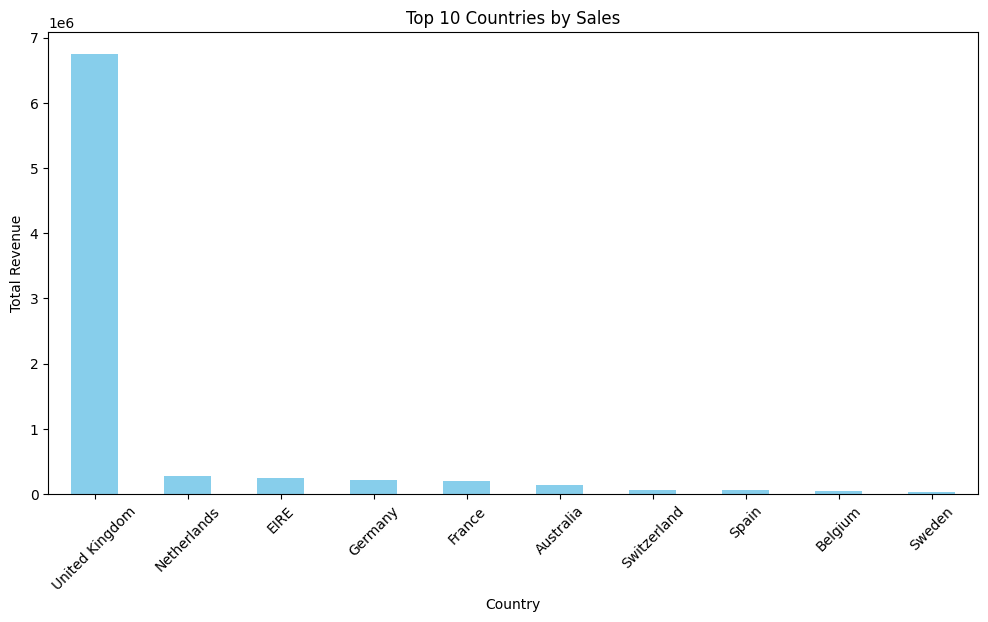

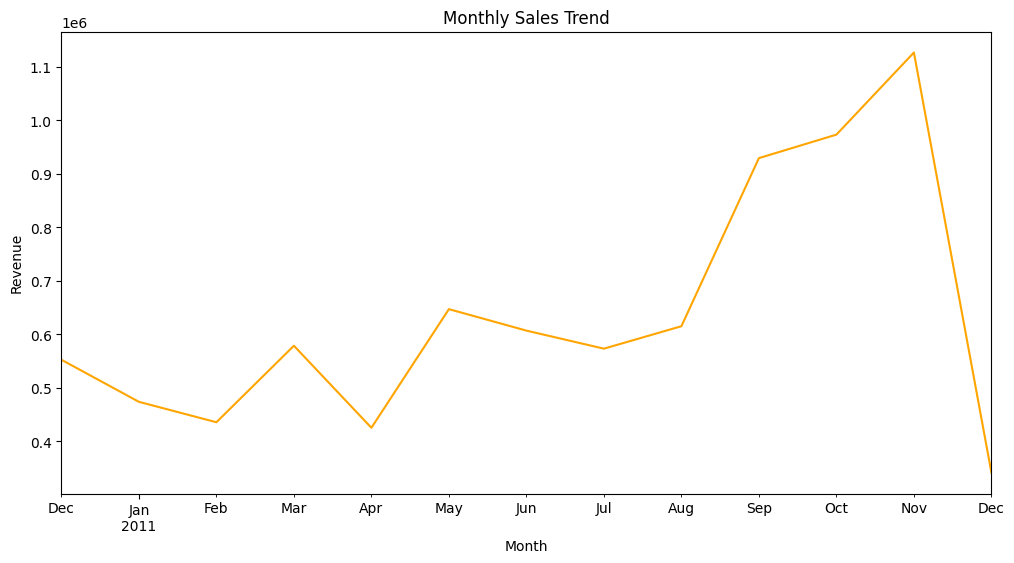

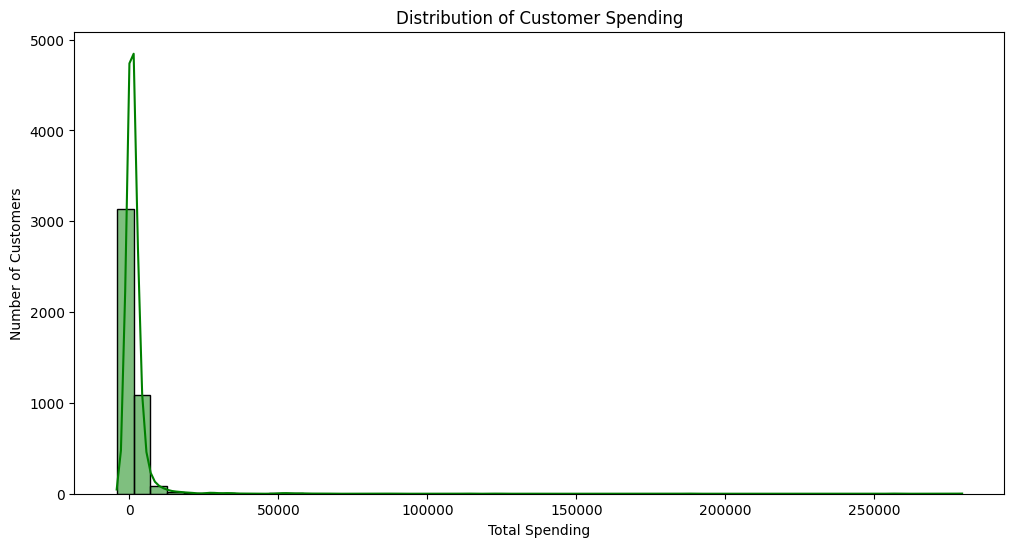

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
file_path = "Cleaned_Online_Retail.xlsx"
retail = pd.read_excel(file_path)

# Add a Revenue column
retail['Revenue'] = retail['Quantity'] * retail['UnitPrice']

# Convert InvoiceDate to datetime
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])

# Sales by Country
sales_by_country = retail.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sales_by_country.plot(kind='bar', color='skyblue')
plt.title("Top 10 Countries by Sales")
plt.xlabel("Country")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

# Sales Trends Over Time
monthly_sales = retail.groupby(retail['InvoiceDate'].dt.to_period('M'))['Revenue'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()

plt.figure(figsize=(12, 6))
monthly_sales.plot(color='orange')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

# Distribution of Customer Spending
customer_spending = retail.groupby('CustomerID')['Revenue'].sum()

plt.figure(figsize=(12, 6))
sns.histplot(customer_spending, bins=50, kde=True, color='green')
plt.title("Distribution of Customer Spending")
plt.xlabel("Total Spending")
plt.ylabel("Number of Customers")
plt.show()


Conclusion

In this project, we explored and analyzed the Online Retail dataset, performing a series of data preprocessing, analysis, and modeling tasks to gain valuable insights into customer behavior and sales performance. Here’s a summary of what we accomplished:

    Data Cleaning and Preparation:
        Identified and removed duplicate rows and missing values to ensure data integrity.
        Addressed outliers in key variables (Quantity, UnitPrice) to refine the dataset for accurate analysis.
        Derived additional metrics, such as Revenue, to enhance the analysis.

    Exploratory Data Analysis (EDA):
        Explored sales trends over time, identifying seasonal patterns and spikes in revenue.
        Highlighted top-performing products and countries contributing to sales.
        Uncovered patterns in customer spending through statistical and graphical analyses.

    Customer Segmentation:
        Utilized RFM analysis to segment customers based on their purchasing behavior.
        Applied K-Means clustering to group customers into distinct segments, providing actionable insights for targeted marketing strategies.
        Experimented with hierarchical clustering, validating the segmentation results and identifying key customer groups.

    Sales Forecasting:
        Conducted time series analysis to forecast future sales using Exponential Smoothing.
        Identified underlying trends and seasonality in the sales data, offering insights for inventory planning and resource allocation.

    Association Rule Mining:
        Applied the Apriori algorithm to uncover frequent itemsets and product associations.
        Generated actionable rules to understand which products are often purchased together, aiding cross-selling and bundling strategies.

    Data Visualization:
        Created insightful visualizations to represent:
            Sales by country, showcasing the most profitable markets.
            Sales trends over time, highlighting revenue growth and seasonality.
            Distribution of customer spending, identifying high-value customers.

Key Achievements:

    Actionable Business Insights:
        Identified top-performing products and markets, enabling data-driven decision-making.
        Segmented customers effectively, paving the way for personalized marketing and loyalty programs.
        Derived insights into sales trends and customer behaviors to optimize business operations.

    Predictive Modeling:
        Leveraged forecasting models to predict future sales, aiding in proactive planning.
        Generated association rules to improve cross-selling and upselling strategies.

    Improved Data Understanding:
        Cleaned and processed the dataset for robust and meaningful analysis.
        Enhanced visualization of sales metrics, making insights accessible and interpretable.

This comprehensive approach not only highlights the potential of the Online Retail dataset but also demonstrates how data-driven methods can drive better business outcomes. Moving forward, these insights can be leveraged to implement targeted strategies, optimize operations, and maximize customer satisfaction and revenue growth.